In [222]:
# check data files first
import os

INPUT_FILES = {
    'health_survey' : './datasets/health_survey.csv',
    'baby_names' : './datasets/baby_names.csv',
    'nz_indicators' : './datasets/nz_indicators.csv',
}

for path in INPUT_FILES.values():
    if not os.path.isfile(path):
        raise Exception("Input file {} does not exist.".format(path))



<IPython.core.display.Javascript object>

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import dateutil.parser as dtparser

%matplotlib inline
plt.style.use("ggplot")
sns.set_palette("muted")
rcParams["figure.figsize"] = 15, 10
rcParams["font.size"] = 20

<IPython.core.display.Javascript object>

## Question1: NZ Health survey data
### a) Importing data:

Read in the health data and save to a dataframe object. There is an encoding argument that can be set
when using read_csv. You may need to set this to ‘latin’ to avoid the ‘utf-8' codec can't decode...’ error (see
the Pandas documentation for further information).

In [224]:
health_survey = pd.read_csv(INPUT_FILES["health_survey"], encoding="latin")

<IPython.core.display.Javascript object>

Remove the first unnamed column and the seven ‘p.value’ columns.

In [225]:
health_survey = health_survey[
    [s for s in health_survey.columns[1:] if not s.startswith("p.value")]
]

<IPython.core.display.Javascript object>

Change all ‘percent’ column name to their associated ‘Year’ values (e.g. the name for ‘percent.16’ changes
to ‘2016’) and change the column name of ‘short.description’ to ‘description’.

In [226]:
health_survey.rename(
    columns={
        c: c.replace("short.", "").replace("percent.", "20")
        for c in health_survey.columns
    },
    inplace=True,
)

<IPython.core.display.Javascript object>

### b) Filtering:

Display the unique labels in the ‘description’ column so that you can inspect them.

In [227]:
labels = set(health_survey["description"])
labels

{'ADHD',
 'Active transport',
 'After-hours medical centre visit',
 'All teeth removed due to decay',
 'Amphetamine use (16-64 years)',
 'Amphetamine use (total population)',
 'Anxiety disorder',
 'Arthritis',
 'Asthma (medicated)',
 'Autism spectrum disorder',
 'Bipolar disorder',
 'Breakfast eaten at home <5 days a week',
 'Breakfast eaten at home every day',
 'Cannabis use',
 'Chronic pain',
 'Current smokers',
 'Daily smokers',
 'Definite confidence and trust in GP',
 'Dental health care worker visit',
 'Depression',
 'Diabetes',
 'ED visit',
 'Eczema (medicated)',
 'Emotional and/or behavioural problems',
 'Ex-smokers',
 'Excellent, very good or good parent-rated health',
 'Excellent, very good or good self-rated health',
 'Exclusively breastfed until 4+ months old',
 'Exclusively breastfed until 6+ months old',
 'Fair or poor parent-rated health',
 'Fair or poor self-rated health',
 'Fast food 1+ times in past week',
 'Fast food 3+ times in past week',
 'Fizzy drink 1+ times per 

<IPython.core.display.Javascript object>

Save a new dataframe object (with an appropriate name) into a new memory location, that contains all the
rows that meet all of the following criteria:
- That match six of the ‘description’ labels of your choosing. For instance, if you were interested in
knowing about ‘Physically active’, ‘Anxiety disorder’, ‘Daily smokers’, ‘Diabetes’, ‘Healthy weight’, and
‘ Self-rated health - very good’, then your dataframe would contain only rows that matched these
‘description’ labels,
- That also match the ‘Total’ label in the Group column
- That also match the ‘adult’ label in the population column

In [228]:
chosen_labels = [
    "Psychological distress",
    "Anxiety disorder",
    "Raised blood pressure (measured)",
    "Self-rated health - good",
    "Chronic pain",
    "Physically active",
]
row_mask = [
    d in chosen_labels and g == "Total" and p == "adults"
    for d, g, p in zip(
        health_survey["description"],
        health_survey["group"],
        health_survey["population"],
    )
]

filtered = health_survey[row_mask]
filtered

,population,description,group,2016,2015,2014,2013,2012,2011,2006,2007
0,adults,Physically active,Total,50.2,47.7,50.7,52.1,51.7,54.4,52.0,NaN
112,adults,Anxiety disorder,Total,10.3,9.5,7.8,8.4,6.4,6.1,4.3,NaN
821,adults,Self-rated health - good,Total,32.9,32.8,32.6,28.3,29.9,31.7,29.2,NaN
1087,adults,Psychological distress,Total,7.6,6.8,6.2,6.2,6.1,4.5,6.6,NaN
1497,adults,Chronic pain,Total,20.2,20.8,19.9,19.0,17.7,16.2,17.0,NaN
1541,adults,Raised blood pressure (measured),Total,22.3,21.5,20.8,23.7,22.5,NaN,NaN,NaN


<IPython.core.display.Javascript object>

### c) Wrangling and reshaping:

Now wrangle and reshape the dataframe that you produced in c) until you end up with the result pictured
below. Your column names and cell values will be different as you will have chosen different
‘short.description’ labels. Please note that the index is ‘Year’ and it is sorted in ascending year order. No
marks will be awarded for solutions that involve hard-coding cell values.

In [229]:
name_map = {key: filtered.loc[key]["description"] for key in filtered.index}
reshaped = filtered[[c for c in filtered.columns if c.startswith("20")]].transpose()
reshaped.rename(columns=name_map, inplace=True)
reshaped.columns.name = "description"
reshaped.index.name = "Year"
reshaped

description,Physically active,Anxiety disorder,Self-rated health - good,Psychological distress,Chronic pain,Raised blood pressure (measured)
Year,,,,,,
2016,50.2,10.3,32.9,7.6,20.2,22.3
2015,47.7,9.5,32.8,6.8,20.8,21.5
2014,50.7,7.8,32.6,6.2,19.9,20.8
2013,52.1,8.4,28.3,6.2,19.0,23.7
2012,51.7,6.4,29.9,6.1,17.7,22.5
2011,54.4,6.1,31.7,4.5,16.2,NaN
2006,52.0,4.3,29.2,6.6,17.0,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

### d) Creating a function:

Write a function that will perform the wrangling from b and c for any combination of population, group and
any number of description labels, e.g. population = ‘adults’, group = ‘Women’, description = [‘Past-year
drinkers’, ‘Amphetamine use’ ...].

In [230]:
def wrangle_data(df, population, group, descriptions):
    row_mask = [
        d in descriptions and g == group and p == population
        for d, g, p in zip(df["description"], df["group"], df["population"])
    ]
    filtered = df[row_mask]

    name_map = {key: filtered.loc[key]["description"] for key in filtered.index}
    reshaped = filtered[[c for c in filtered.columns if c.startswith("20")]].transpose()
    reshaped.rename(columns=name_map, inplace=True)
    reshaped.columns.name = "description"
    reshaped.index.name = "Year"
    return reshaped

<IPython.core.display.Javascript object>

Test the function with some different values for your arguments and show that it returns dataframes like
you produced in c)

In [231]:
wrangle_data(
    health_survey,
    "adults",
    "Total",
    [
        "Ischaemic heart disease",
        "Anxiety disorder",
        "Vegetable intake",
        "Physically active",
        "Chronic pain",
        "Current smokers",
    ],
)

description,Physically active,Anxiety disorder,Current smokers,Ischaemic heart disease,Chronic pain,Vegetable intake
Year,,,,,,
2016,50.2,10.3,15.7,4.9,20.2,61.7
2015,47.7,9.5,16.3,4.6,20.8,62.5
2014,50.7,7.8,16.6,4.6,19.9,64.9
2013,52.1,8.4,17.4,4.7,19.0,64.5
2012,51.7,6.4,17.7,4.8,17.7,66.7
2011,54.4,6.1,18.2,5.5,16.2,68.6
2006,52.0,4.3,20.1,5.3,17.0,63.9
2007,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [232]:
wrangle_data(
    health_survey,
    "children",
    "Girls",
    [
        "Thin",
        "Teeth removed due to decay in past 12 months",
        "Television watching",
        "Fruit intake",
        "Unmet need for GP due to lack of childcare",
        "Vegetable intake",
    ],
)

description,Fruit intake,Teeth removed due to decay in past 12 months,Unmet need for GP due to lack of childcare,Vegetable intake,Television watching,Thin
Year,,,,,,
2016,74.4,3.6,1.3,51.6,39.2,4.5
2015,73.9,3.4,2.3,48.7,45.5,5.1
2014,77.5,3.0,2.0,59.2,44.9,4.0
2013,75.2,4.3,2.2,57.3,50.9,4.9
2012,75.8,4.2,2.9,59.3,50.7,5.2
2011,75.8,3.4,2.7,59.0,53.7,4.6
2006,NaN,NaN,NaN,NaN,NaN,3.2
2007,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

### e) Plotting:

Create two plots of your choosing by using one or more of the dataframes that you have created. Ensure
they are appropriate for encoding the data you are displaying. Also ensure they are correctly labelled, with
appropriate axis names and tick labels, and a title. We should be able to understand what the plots are
showing us without having to read the code.

#### plot 1

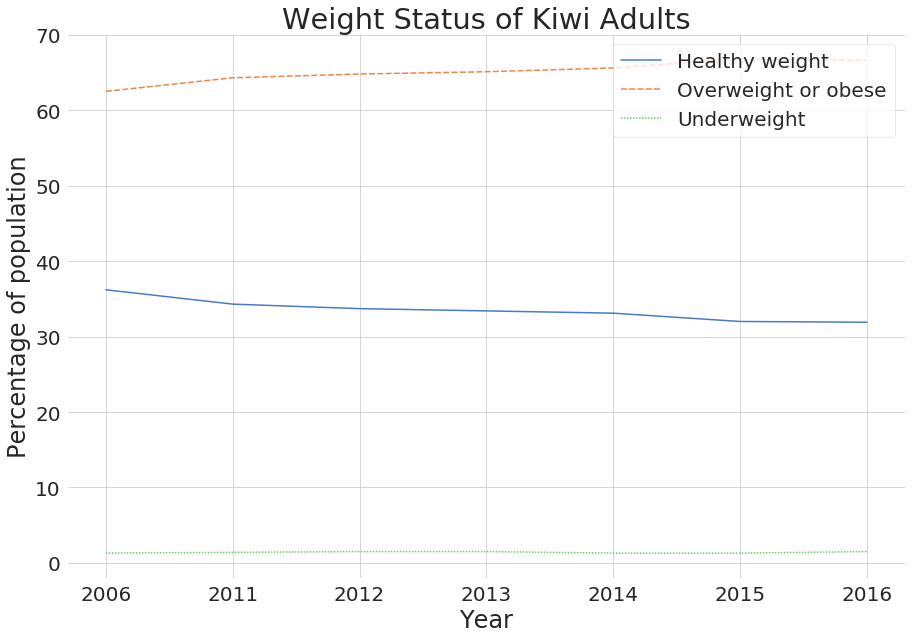

<IPython.core.display.Javascript object>

In [233]:
adults_weight = wrangle_data(
    health_survey,
    "adults",
    "Total",
    ["Healthy weight", "Overweight or obese", "Underweight"],
)
sns.set_style("whitegrid")
sns.lineplot(data=adults_weight).set(
    xlabel="Year",
    ylabel="Percentage of population",
    title="Weight Status of Kiwi Adults",
)
sns.despine(left=True, bottom=True)

**Insights:**

- Overweight is a problem in New Zealand. We have over 60% of people that are overweight or obese, while 30% - 40% of people are of healthy weight. (We also have a very small number of people that are underweight).
- The overweight problem seems to get worse year by year from 2006 to 2016. As shown in the plot, the trend line representing overweight or obese goes up and the trend line representing healthy weight goes down. (The trend line representing underweight remains the same.)

#### plot 2

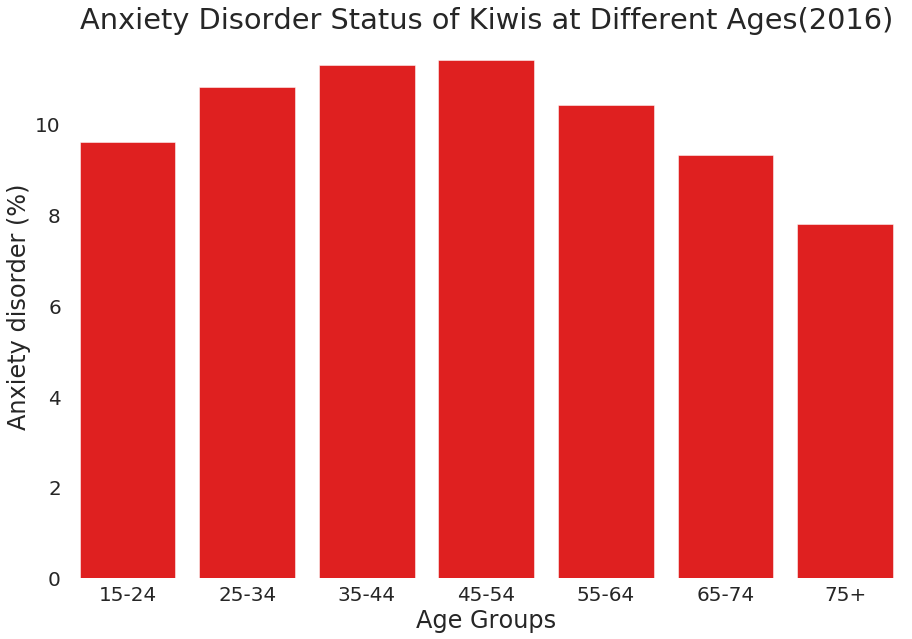

<IPython.core.display.Javascript object>

In [234]:
age_groups = ["15-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"]
row_mask = [
    d == "Anxiety disorder" and g in age_groups
    for d, g in zip(health_survey["description"], health_survey["group"])
]

anxiety_2016_ages = health_survey[row_mask].loc[:, "group":"2016"]
sns.set_style("white")
sns.barplot(data=anxiety_2016_ages, x="group", y="2016", color="red").set(
    xlabel="Age Groups",
    ylabel="Anxiety disorder (%)",
    title="Anxiety Disorder Status of Kiwis at Different Ages(2016)",
)
sns.despine(bottom=True, left=True)

**Insights:**

- People of different age groups obviously vary when it comes to suffering from the anxiety disorder.
- Starting at the teenager age group, more people suffer from the anxiety disorder as the age goes older until their 50s. After 50s, the elder people are, the fewer of them suffer from the anxiety disorder.

## Question 2: NZ Top 100 baby names time series

In [235]:
baby_names = pd.read_csv(INPUT_FILES["baby_names"])

<IPython.core.display.Javascript object>

### plot 1 - Popular Names Get Less Popular

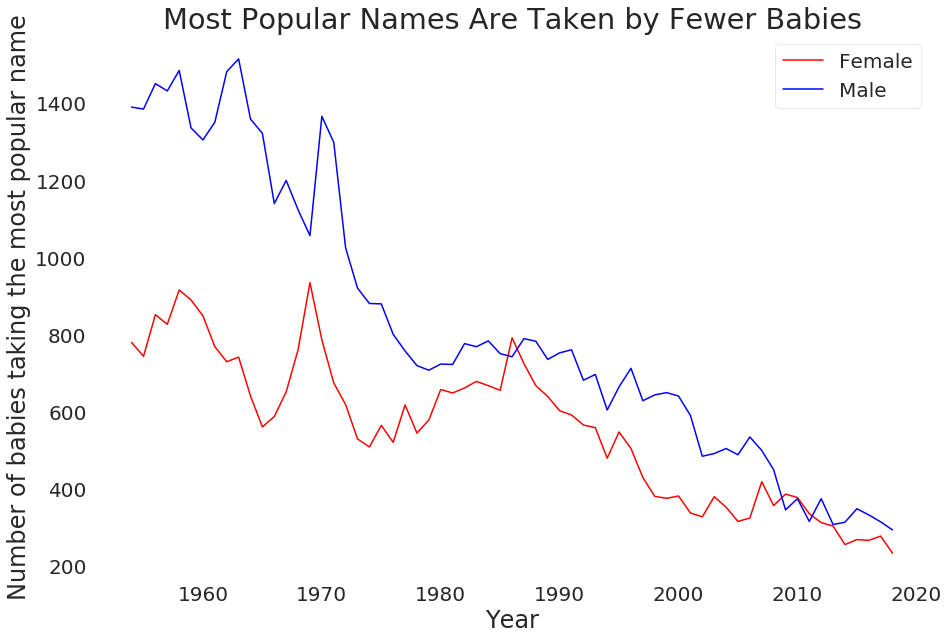

<IPython.core.display.Javascript object>

In [236]:
top_nums = baby_names.groupby(["year", "sex"]).agg({"No.": "max"})["No."]
top_nums = top_nums.unstack()
sns.lineplot(data=top_nums, palette=["red", "blue"], dashes=False).set(
    xlabel="Year",
    ylabel="Number of babies taking the most popular name",
    title="Most Popular Names Are Taken by Fewer Babies",
)
sns.despine(bottom=True, left=True)

**Analysis:**

For each year since 1954, we have the most popular name for boys and for girls. But the plot shows that the popular names are getting less popular year after year. This is especially true for male names, with its most popular name taken by around 1400 boys in 1954 but only around 300 boys in 2018.

There are different possible reasons to explain this. For example, it could be because parents are getting more various ideas about naming their babies in modern society. It could also be an indication of the country's population change across the years. Without more data, it's hard to tell.

There is an "outlier" in female names: In 1986 and 1987, the red line rises up to form a sharp local peak, which is against the general trend as well as the blue line at the same years. A closer look at the data shows that more Kiwi parents named their baby girls "Sarah" at those two years. Again, given more data, we may find some interesting results.

### plot 2 - Evergreen Names

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

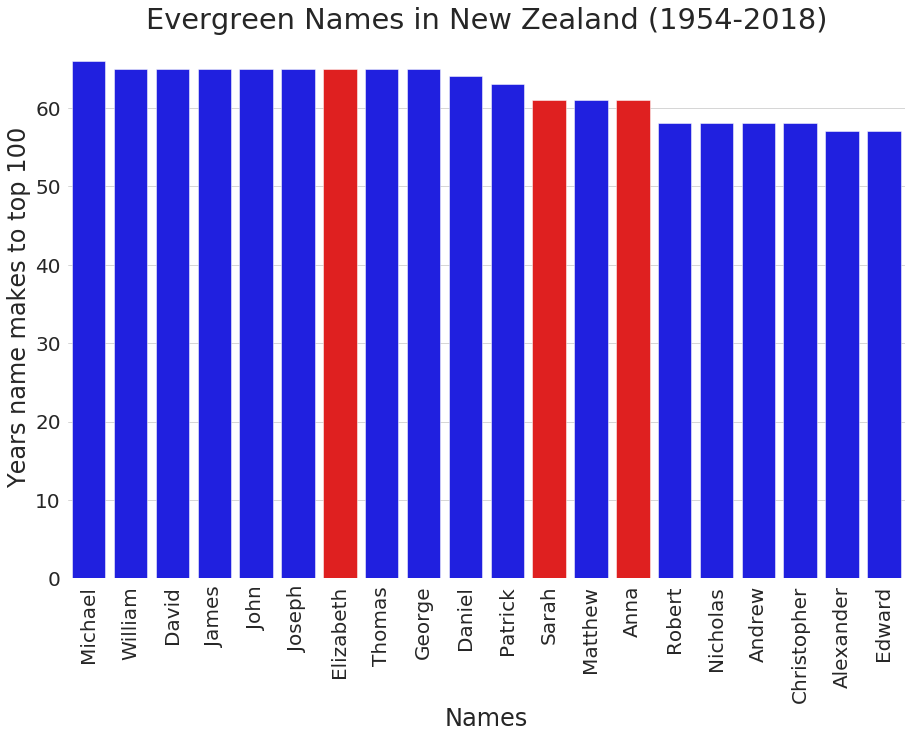

<IPython.core.display.Javascript object>

In [237]:
names_times = pd.crosstab([baby_names.sex], baby_names["Name"]).transpose()
names_times["Total"] = names_times.Female + names_times.Male
evergreen_names = (
    names_times.reset_index().sort_values(by="Total", ascending=False).head(20)
)
sns.set_style("whitegrid")
sns.barplot(
    data=evergreen_names,
    x="Name",
    y="Total",
    palette=[
        "red" if g < 0 else "blue"
        for g in evergreen_names.Male - evergreen_names.Female
    ],
).set(
    xlabel="Names",
    ylabel="Years name makes to top 100",
    title="Evergreen Names in New Zealand (1954-2018)",
)
sns.despine(bottom=True, left=True)
plt.xticks(rotation=90)

**Analysis:**
    
Some of the names remain evergreen across all the past six decades. In particular, Michael, William, David, James, John, Joseph, Elizabeth, Thomas, and George, have made it to the top 200 names for every single year during the 65 years the data cover. Note that this is not exactly the same as how popular they are, as we only count if it makes to the top 200 list, not considering the actual number of babies taking the name each year.

It's also interesting that among the 20 evergreen names, most of them are boy names. This implies that there are more diverse female names for girls' parents to choose from, while boys' parents often just turn to the classic few.

Note: The plot shows that "Michael" has shown up in the list for 66 times, which is impossible given we only have 65 years' data. This is due to some error in the data: there are two records for name Michael in 1988.

### plot 3 - Most popular initial letters

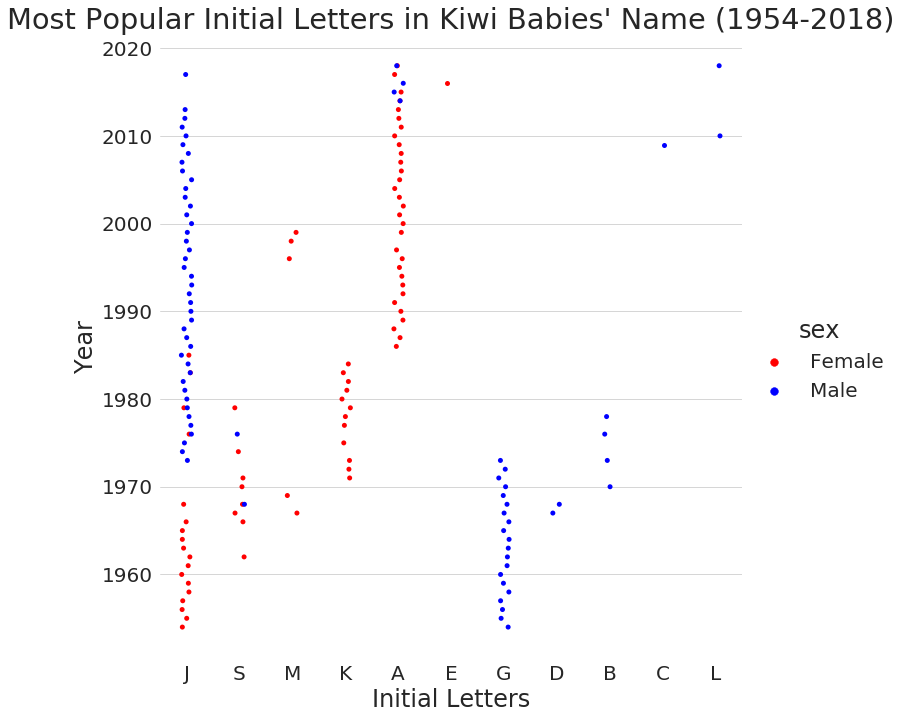

<IPython.core.display.Javascript object>

In [238]:
def top_init_letter(s):
    return s.str.slice(stop=1).mode()


pivot = (
    baby_names.pivot_table(
        index=["sex", "year"], values="Name", aggfunc=top_init_letter
    )
    .explode("Name")
    .reset_index()
)
sns.catplot(
    data=pivot,
    x="Name",
    y="year",
    hue="sex",
    height=10,
    palette={"Female": "red", "Male": "blue"},
).set(
    xlabel="Initial Letters",
    ylabel="Year",
    title="Most Popular Initial Letters in Kiwi Babies' Name (1954-2018)",
)
sns.despine(bottom=True, left=True)

**Analysis:**

It's interesting that a letter would dominate the list for a few decades before the next letter takes its place. 

The red dots show that J is the most popular initial letter for girl names before the 1970s. Then letters like S, M, K catch up for a while, until the (unusual) vowel letter A jumps to the top since the 1990s. 

As for boys, letter G is the most popular until the mid 1970s, when letter J takes over. Note that, as we've shown in plot 2, evergreen names like James and George, despite the difference in initial letters, the letters are actually pronounced the same: [dʒ] in IPA. So it's possible that the transition from G to J is somewhat deceptive.

## Question 3: NZ Indicator data

# House affordability, house buyers, and income inequality

## Introduction
House market has always been a heated topic in New Zealand. Around this topic, a lot of questions are being asked: Are houses really getting less affordable as we have felt? Are the house buyers general public or mostly rich guys? More importantly, the relationship between the two: is New Zealand as a society becoming more financially unequal, as the houses become less affordable?
This rudimentary analysis utilizes data collected during the past decades to provide some insight into these questions.

## Data cleaning and wrangling
- Reading from the nz_indicator file the data we are interested in.
- Parsing time and sort the data by year.
- Handling missing data. For data imputation, we adopt the preceding values. This approach is chosen because we are analyzing data that are organized by year, and the values, in general, would not change drastically between consequent years.

In [239]:
nzi = pd.read_csv(
    INPUT_FILES["nz_indicators"], encoding="latin", na_values=["NAN","???", "-", "None"]
)
nzi.year = [dt.year for dt in nzi.year.apply(dtparser.parse)]
nzi = (
    nzi[
        [
            "year",
            "home_ownership_rate",
            "house_median_multiples",
            "Q5:Q1",
        ]
    ]
    .sort_values(by="year")
    .fillna(method="ffill")
    .dropna()
    .set_index("year")
)

def biggerThanMean(s):
    return s > sum(s)/s.size

# would be easier to just subtract nzi["Q5:Q1"].mean(), but need to define a func for marking purpose
nzi["BigIncomeGap"] = biggerThanMean(nzi["Q5:Q1"]) 

nzi


,home_ownership_rate,house_median_multiples,Q5:Q1,BigIncomeGap
year,,,,
2001,67.656722,3.204032,5.42,False
2002,67.468240,3.300737,5.42,False
2003,67.278171,3.620934,5.42,False
2004,67.087263,4.029125,5.51,False
2005,66.898248,4.481679,5.51,False
2006,66.614116,4.695639,5.51,False
2007,66.311887,5.000075,5.31,False
2008,66.012879,4.708076,5.34,False
2009,65.708756,4.652291,5.34,False


<IPython.core.display.Javascript object>

## Analysis

### Just how expensive houses are?

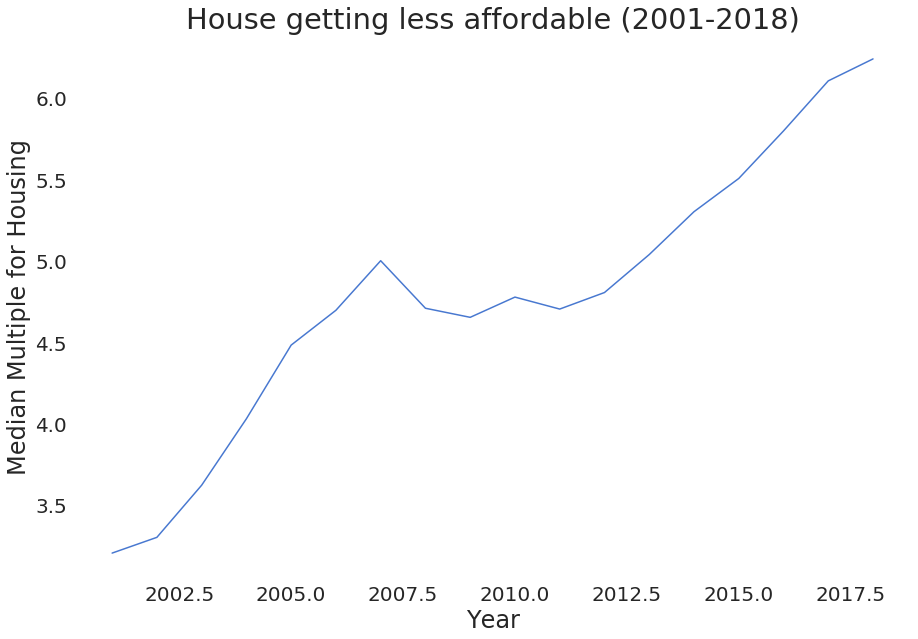

<IPython.core.display.Javascript object>

In [240]:
sns.set_style("white")
sns.lineplot(data=nzi["house_median_multiples"]).set(
    xlabel="Year",
    ylabel="Median Multiple for Housing",
    title="House getting less affordable (2001-2018)",
)
sns.despine(bottom=True, left=True)

These data show the ratio of median house price to median annual household income, i.e. how many years it would take a family to buy a house if they save every penny they earn? It is obviously unrealistic for a family to not spend on food or anything alike. But the trend is clear: in 2001, it takes a family 3.2 years' income to buy a house, whereas it takes 6.24 years in 2018.

The line keeps rising up except for the years around 2008, when the recession caused by the subprime crisis in America affected the world's house market. It is safe to claim that, houses in New Zealand are becoming less and less affordable.

### Who is buying all the houses?

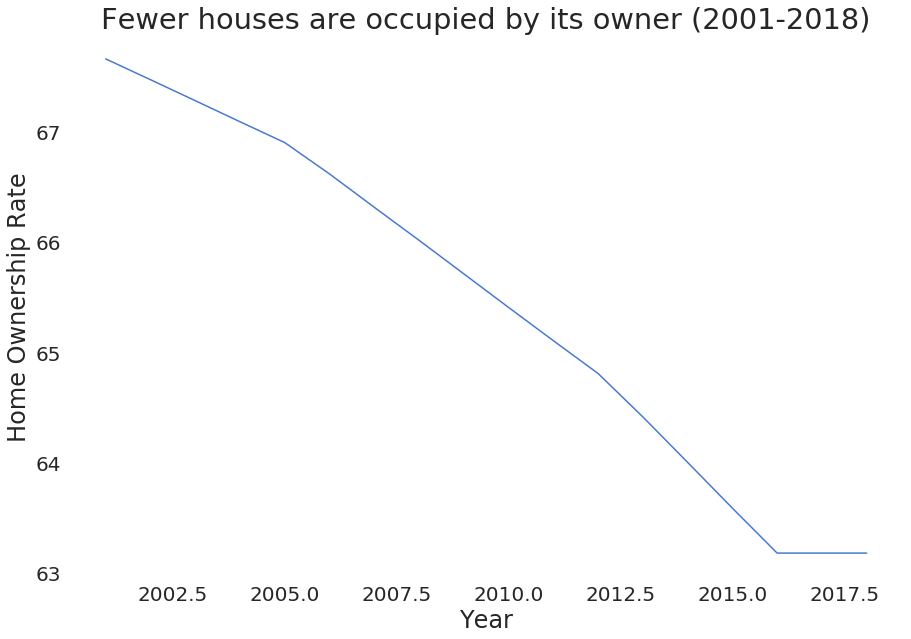

<IPython.core.display.Javascript object>

In [241]:
sns.set_style("white")
sns.lineplot(data=nzi["home_ownership_rate"]).set(
    xlabel="Year",
    ylabel="Home Ownership Rate",
    title="Fewer houses are occupied by its owner (2001-2018)",
)
sns.despine(bottom=True, left=True)

Common sense tells us that price of an item is determined by its supplies and needs ratio. We know the house price is high, so where are the new houses developed? Who is buying them, hence creating the needs, making the price remain at a high place? 

Home ownership rate is the percentage of the houses which its owner resides. The plot shows that this rate has been falling since year 2001. This means fewer and fewer houses are actually being occupied by its owner. In other words, more and more houses are being purchased and then used for rental, investment purposes, etc. 

People who already own a living place are buying more houses in the market.

### Is the country's income gap getting bigger between the rich and the poor?

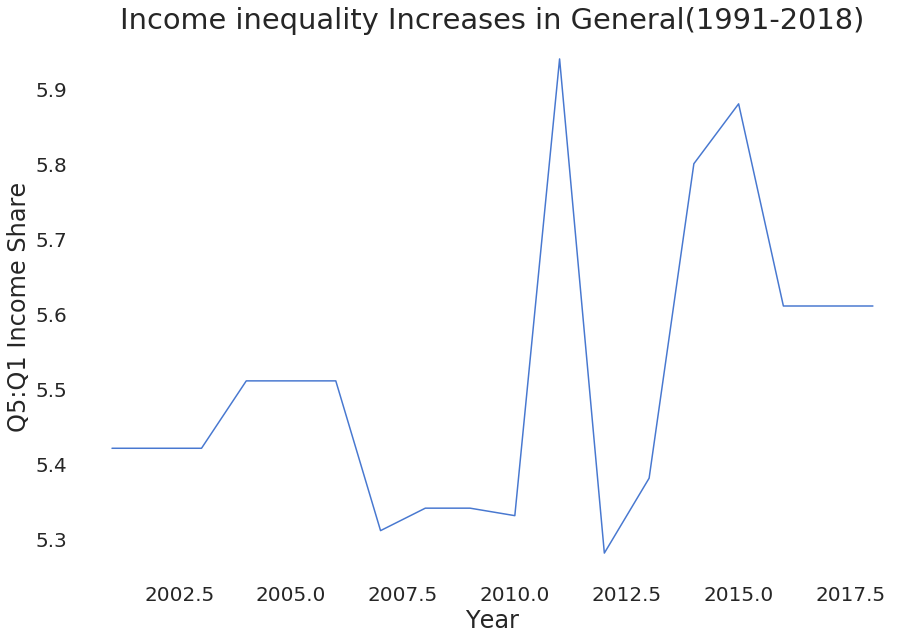

<IPython.core.display.Javascript object>

In [242]:
sns.set_style("white")
sns.lineplot(data=nzi["Q5:Q1"]).set(
    xlabel="Year",
    ylabel="Q5:Q1 Income Share",
    title="Income inequality Increases in General(1991-2018)",
)
sns.despine(bottom=True, left=True)

If the total income shares of people in the top and bottom income quintiles diverge (income inequality increases), the Q5:Q1 ratio increases. The plot shows that the inequality goes up and down, but slowly increases in general. This means that the income gap between the poorest and the riches slowly gets bigger. 

As a side note, there's an obvious valley on the plot around year 2008. This shows that the financial and house market fluctuation affects the richest more than the poorest.

### Relationship between the income gap and house price

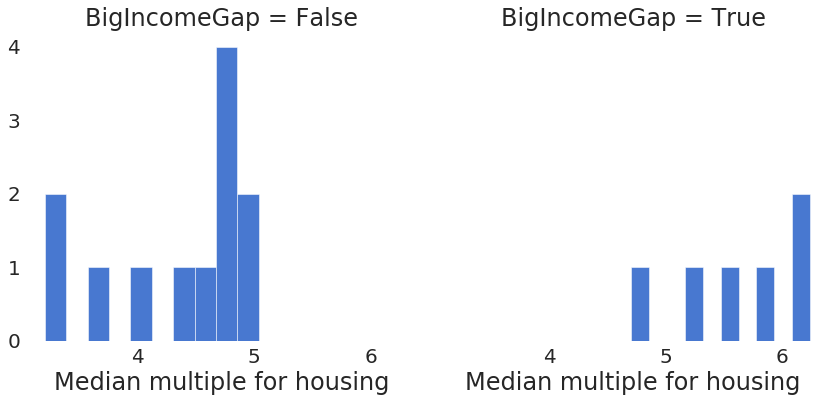

<IPython.core.display.Javascript object>

In [243]:
g = sns.FacetGrid(nzi, col="BigIncomeGap", height=6)
g.map(plt.hist, "house_median_multiples").set(xlabel="Median multiple for housing",)
sns.despine(bottom=True, left=True)

Is there a relationship between the societal income gap and the house affordability?
If we divide the data into two categories by the size of the income gap, we can observe that: the years in which big income gap occurs, indeed the houses tend to be less affordable, and vice versa.

## Conclusion

We have first confirmed that for the past two decades, houses in New Zealand are becoming less affordable. We then showed that an increasing number of houses are actually owned by people who do not purchase for their own residence purpose. Finally, we showed that the country's house affordability relates to the income gap between the rich and the poor.